In [1]:
# Import libraries
import pandas as pd
from JsonConverter import *

In [2]:
# Make participant dataframe with JsonConverter class
json_converter = JsonConverter("./data.json")
participants_df = json_converter.make_participants_df()

# Format names
participants_df.index = participants_df.index.str.split().str[0] + ' ' + participants_df.index.str.split().str[1].str[0] + '.'

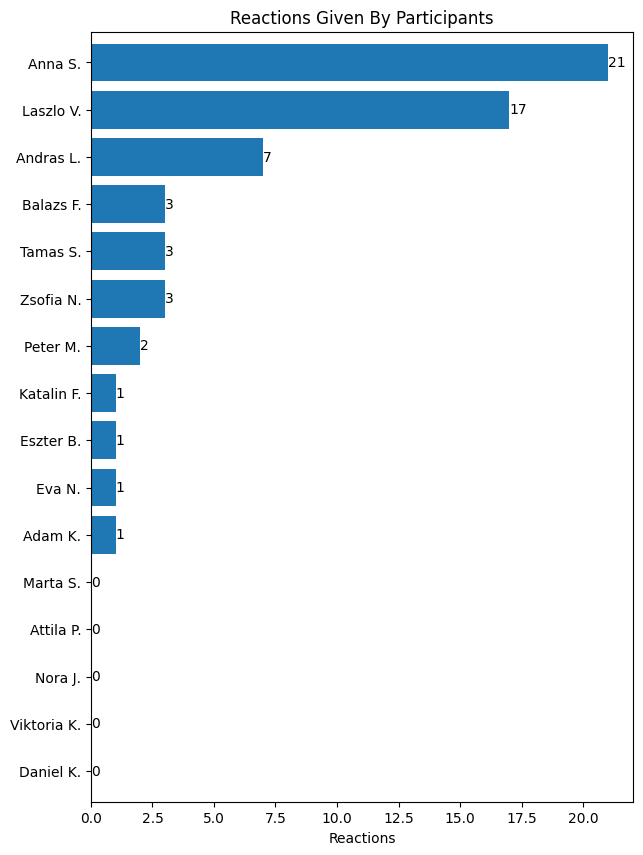

In [3]:
# Sort values by reactions given
participants_df.sort_values('Reactions_given', inplace=True)

# Horizontal barplot
ax = participants_df.plot.barh(y='Reactions_given',
                                figsize=(7,10), 
                                legend=False, 
                                xlabel='Reactions', 
                                width=0.8,
                                title='Reactions Given By Participants' )

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)


<Axes: title={'center': 'Reactions Given'}>

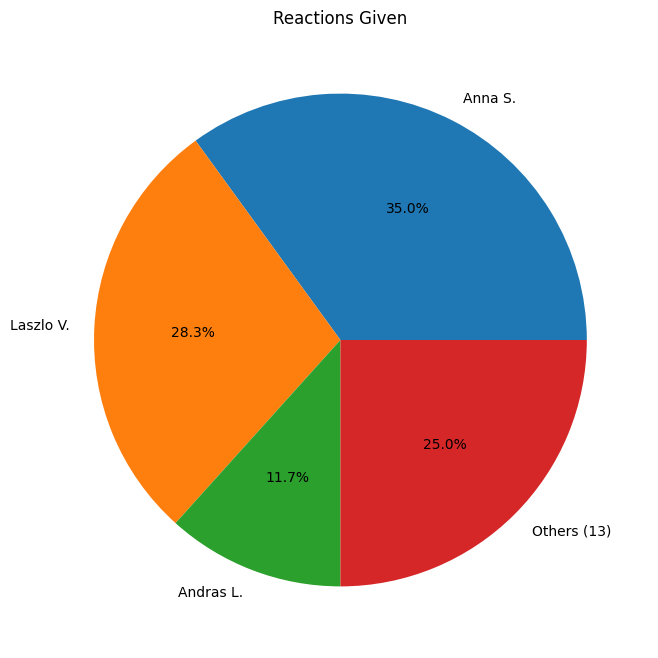

In [4]:

# Average of reactions given
avg_reac_giv = participants_df.Reactions_given.sum() / participants_df.Reactions_given.count()

# Number of people below average of reactions given
below_avg_count = participants_df[participants_df.Reactions_given <= avg_reac_giv].count().Reactions_given

# Create label for 'others'
others_string = "Others (" + str(below_avg_count) + ")"

# Create a DataFrame for reactions given above the average
reac_giv_df = participants_df[participants_df.Reactions_given > avg_reac_giv]['Reactions_given'].copy()
reac_giv_df.sort_values(inplace=True, ascending=False)

# Add 'others' row to the DataFrame
reac_giv_df.loc[others_string] = participants_df[participants_df.Reactions_given <= avg_reac_giv].Reactions_given.sum()

# Pie plot
reac_giv_df.plot.pie(y='Reactions_given', 
                     figsize=(8,8), 
                     autopct='%1.1f%%', 
                     title='Reactions Given', 
                     legend=False, 
                     ylabel='')

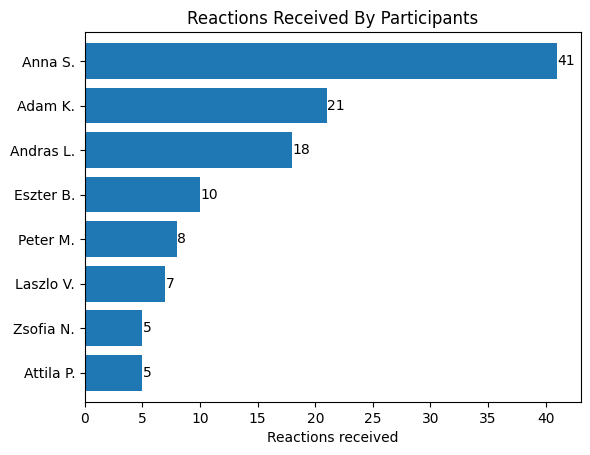

In [5]:

# Create DataFrame with rows more than 3 reactions received
reac_rec_df = participants_df[participants_df['Reactions_received'] > 3].copy()
reac_rec_df.sort_values('Reactions_received', inplace=True)

# Horizontal bar plot
ax = reac_rec_df.plot.barh(y='Reactions_received', 
                           legend=False, 
                           xlabel='Reactions received', 
                           width=0.8,
                           title='Reactions Received By Participants')

# Add labels
for container in ax.containers:
    ax.bar_label(container)

<Axes: title={'center': 'Reactions Received'}>

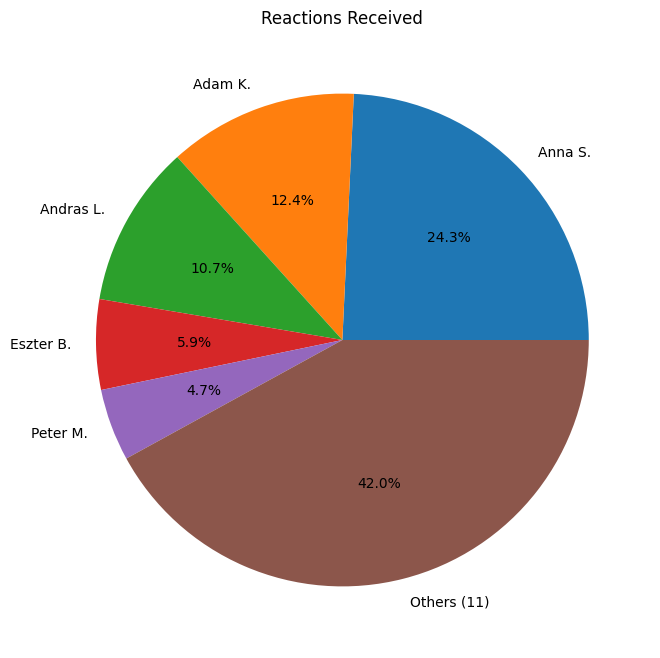

In [6]:

# Average of reactions received
avg_reac_giv = participants_df.Reactions_received.sum() / participants_df.Reactions_received.count()

# Number of people below average reactions received
below_avg_count = participants_df[participants_df.Reactions_received <= avg_reac_giv].count().Reactions_received

# Create label for 'others'
others_string = "Others (" + str(below_avg_count) + ")"

# Create a DataFrame for reactions received above the average
reac_rec_df = participants_df[participants_df.Reactions_received > avg_reac_giv]['Reactions_received'].copy()
reac_rec_df.sort_values(inplace=True, ascending=False)

# Add 'others' row
reac_rec_df.loc[others_string] = participants_df[participants_df.Reactions_given <= avg_reac_giv].Reactions_received.sum()

# Pie plot
reac_rec_df.plot.pie(y='Reactions_received', 
                     figsize=(8,8), 
                     autopct='%1.1f%%', 
                     title='Reactions Received', 
                     legend=False, 
                     ylabel='')

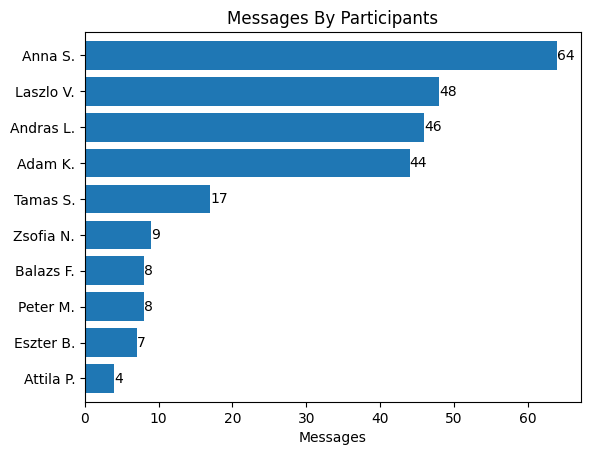

In [7]:
# Create DataFrame with rows more than 3 messages
msg_df = participants_df[participants_df['Messages'] > 3].copy()
msg_df.sort_values('Messages', inplace=True)

# Horizontal bar plot
ax = msg_df.plot.barh(y='Messages', 
                      legend=False, 
                      xlabel='Messages', 
                      width=0.8,
                      title='Messages By Participants')

# Add labels
for container in ax.containers:
    ax.bar_label(container)

<Axes: title={'center': 'Messages'}>

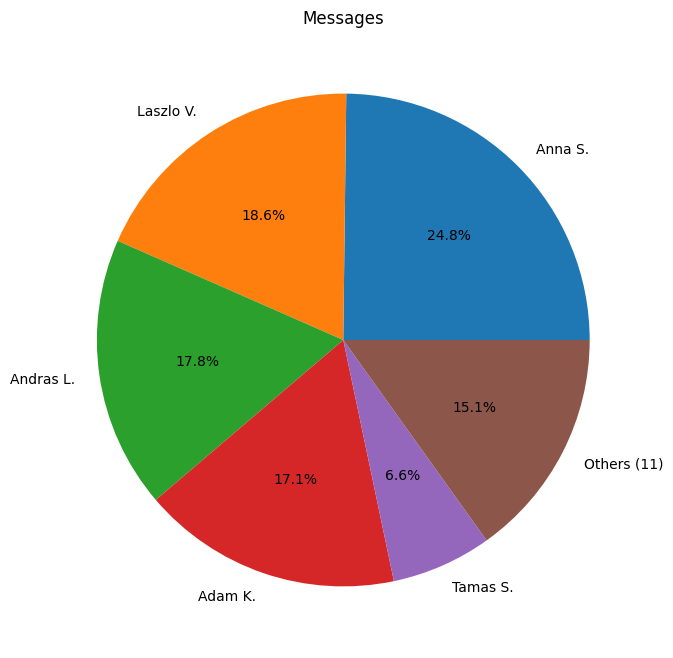

In [8]:
# Average of messages
avg_msg = participants_df.Messages.sum() / participants_df.Messages.count()

# Number of people below average messages
below_avg_count = participants_df[participants_df.Messages <= avg_msg].count().Messages

# Create label for 'others'
others_string = "Others (" + str(below_avg_count) + ")"

# Create DataFrame with rows above average in messages
msg_df = participants_df[participants_df.Messages > avg_msg]['Messages'].copy()
msg_df.sort_values(inplace=True, ascending=False)

# Add 'others' row
msg_df.loc[others_string] = participants_df[participants_df.Messages <= avg_msg].Messages.sum()

# Pie plot
msg_df.plot.pie(y='Messages', figsize=(8,8), autopct='%1.1f%%', title='Messages', legend=False, ylabel='')

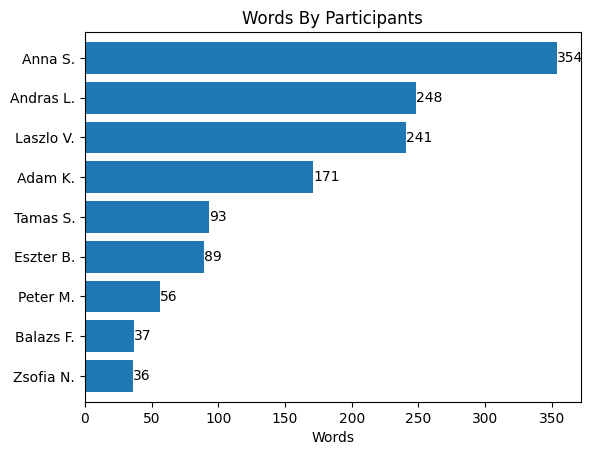

In [9]:

# Create DataFrame with rows more than 20 words
words_df = participants_df[participants_df['Words'] > 20].copy()
words_df.sort_values('Words', inplace=True)

# Horizontal bar plot
ax = words_df.plot.barh(y='Words', 
                        legend=False, 
                        xlabel='Words', 
                        width=0.8,
                        title='Words By Participants')

# Add labels
for container in ax.containers:
    ax.bar_label(container)

<Axes: title={'center': 'Words'}>

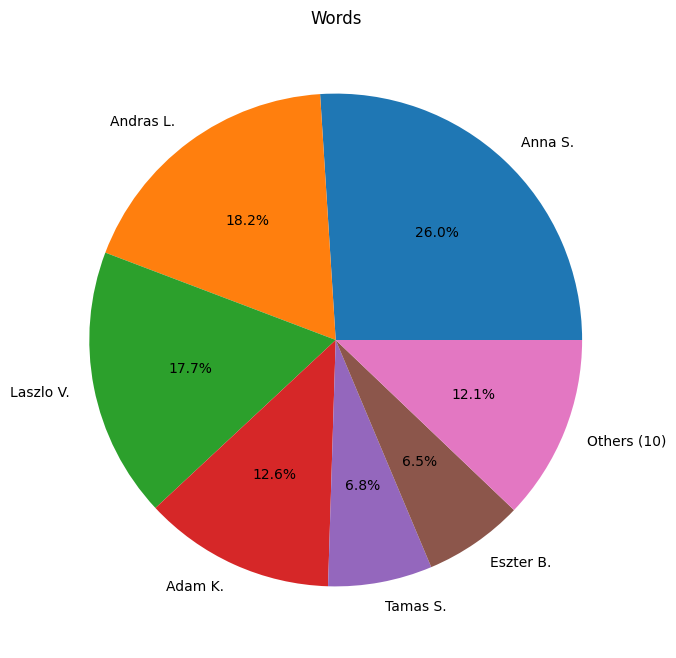

In [10]:
# Average of words
avg_words = participants_df.Words.sum() / participants_df.Words.count()

# Number of people below average words
below_avg_count = participants_df[participants_df.Words <= avg_words].count().Words

# Label for 'others'
others_string = "Others (" + str(below_avg_count) + ")"

# Create DataFrame with rows above average in words
words_df = participants_df[participants_df.Words > avg_words]['Words'].copy()
words_df.sort_values(inplace=True, ascending=False)

# Add 'others' row
words_df.loc[others_string] = participants_df[participants_df.Words <= avg_words].Words.sum()

# Pie plot
words_df.plot.pie(y='Words', figsize=(8,8), 
                  autopct='%1.1f%%', 
                  title='Words', 
                  legend=False, 
                  ylabel='')

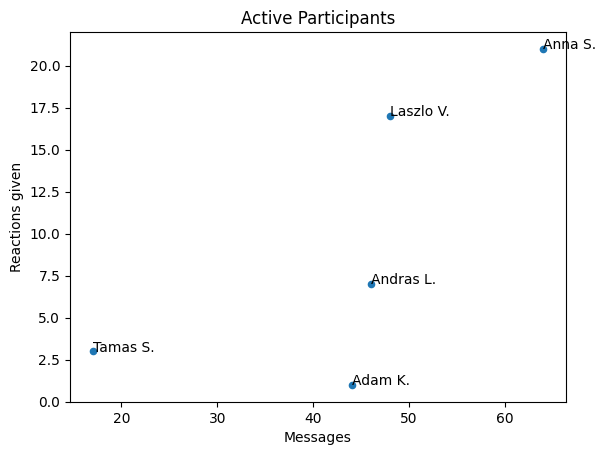

In [11]:
# Average of messages
avg_msg = participants_df.Messages.sum()/participants_df.Messages.count()

# Create DataFrame with rows above average in words
active_members_df = participants_df[participants_df.Messages > avg_msg][['Messages', 'Reactions_given']].copy()

# Scatter plot
ax = active_members_df.plot.scatter(x='Messages',
                                    y='Reactions_given',
                                    title='Active Participants',
                                    ylabel='Reactions given')

# Add annotation
for idx, row in active_members_df.iterrows():
    ax.annotate(idx, (row['Messages'], row['Reactions_given']))

<Axes: title={'center': 'Messages By Top 8 Participants'}, xlabel='Date', ylabel='Messages'>

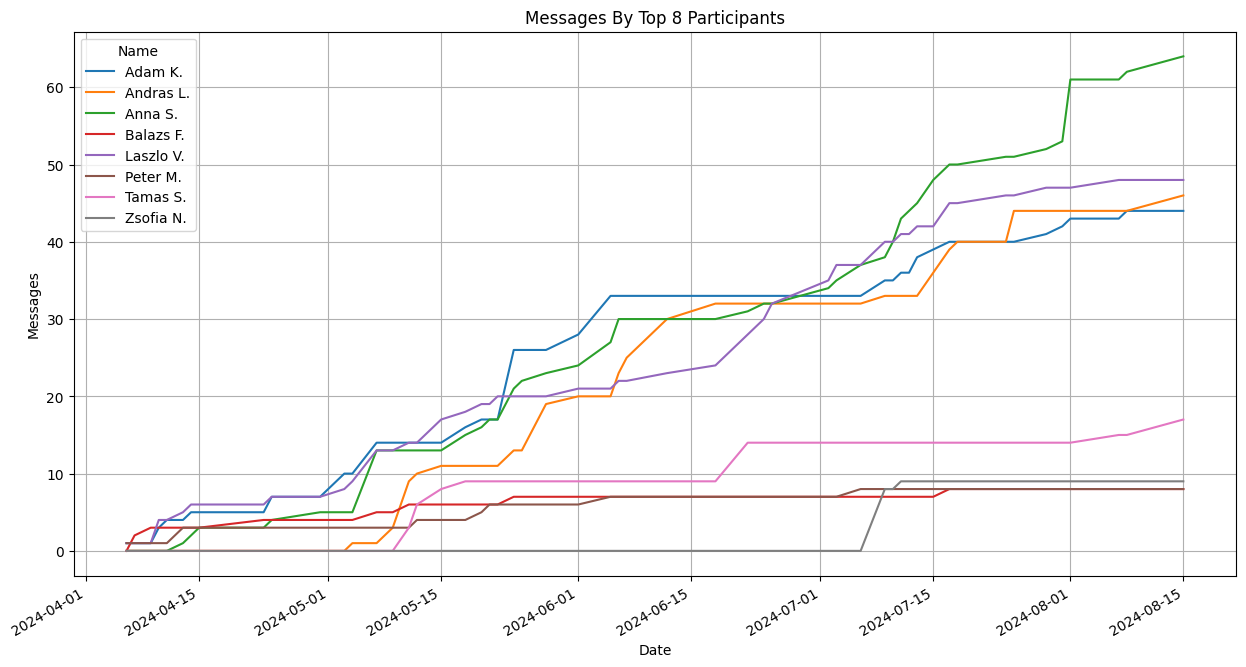

In [12]:
# Create dataframe with JsonConverter
messages_df = json_converter.make_messages_df()

# Format names
messages_df.Name = messages_df.Name.str.split().str[0] + ' ' + messages_df.Name.str.split().str[1].str[0] + '.'

# Convert timestamps to datetime
messages_df.Timestamp = pd.to_datetime(messages_df.Timestamp, unit='ms')

# Find top 8 participants with most messages
top8_msg = participants_df.sort_values('Messages',ascending=False)[0:8].index

# Create DataFrame with only top 8
message_df_top8 = messages_df[messages_df['Name'].isin(top8_msg)]

# Count messages by day
name_counts = message_df_top8.groupby([pd.Grouper(key='Timestamp', freq='D'), 'Name']).size().unstack(fill_value=0)

# Calculate the cumulative sum over time for each name
cumulative_name_counts = name_counts.cumsum()

# Line plot
cumulative_name_counts.plot.line(
    figsize=(15, 8),
    title='Messages By Top 8 Participants',
    xlabel='Date',
    ylabel='Messages',
    grid=True
)


<Axes: title={'center': 'Reactions By Top 8 Participants'}, xlabel='Date', ylabel='Reactions'>

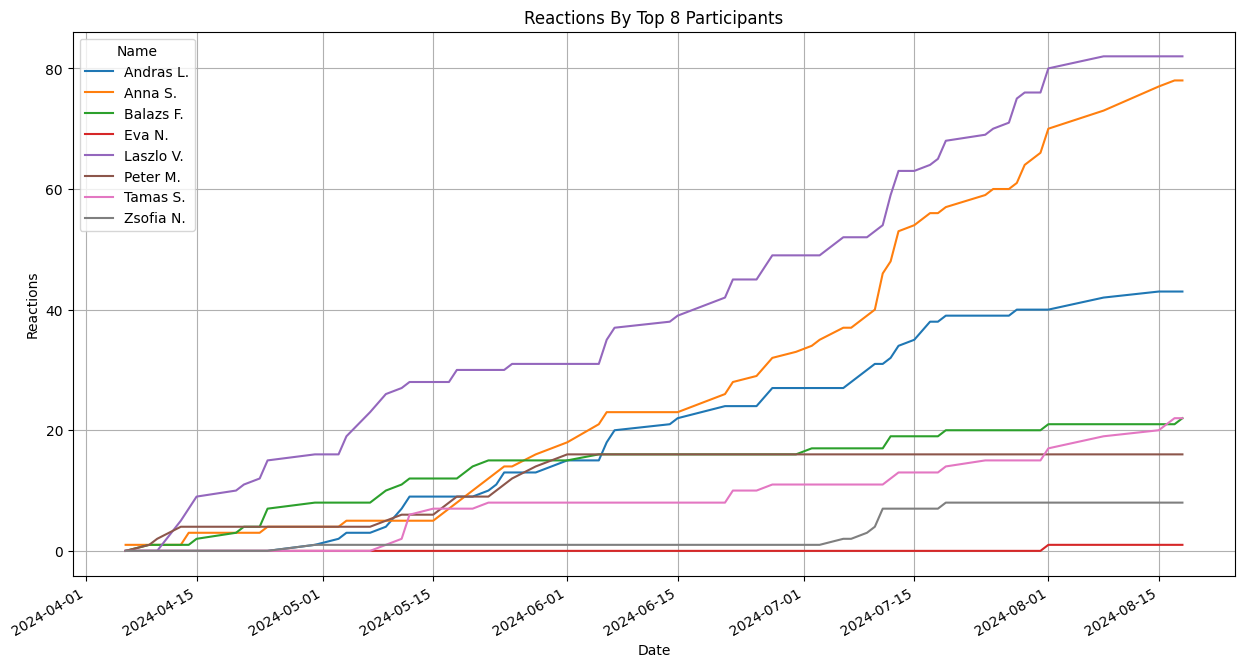

In [13]:
# Create DataFrame with jsonConverter
reactions_df = json_converter.make_reactions_df()

# Format names
reactions_df.Name = reactions_df.Name.str.split().str[0] + ' ' + reactions_df.Name.str.split().str[1].str[0] + '.'

# Convert timestamps to datetime
reactions_df.Timestamp = pd.to_datetime(reactions_df.Timestamp, unit='ms')

# Find top 8 person with most reactions
top8_msg = participants_df.sort_values('Reactions_given',ascending=False)[0:8].index

# Make DataFrame with only top 8
reactions_df_top8 = reactions_df[reactions_df['Name'].isin(top8_msg)]

# Count reactions by day
name_counts = reactions_df_top8.groupby([pd.Grouper(key='Timestamp',freq='D'), 'Name']).size().unstack(fill_value=0)

# Calculate the cumulative sum over time for each name
cumulative_name_counts = name_counts.cumsum()

# Line plot
cumulative_name_counts.plot.line(
    figsize=(15,8),
    title='Reactions By Top 8 Participants',
    xlabel='Date',
    ylabel='Reactions',
    grid=True
)


<Axes: title={'center': 'Chat Activity'}, xlabel='Date', ylabel='Messages'>

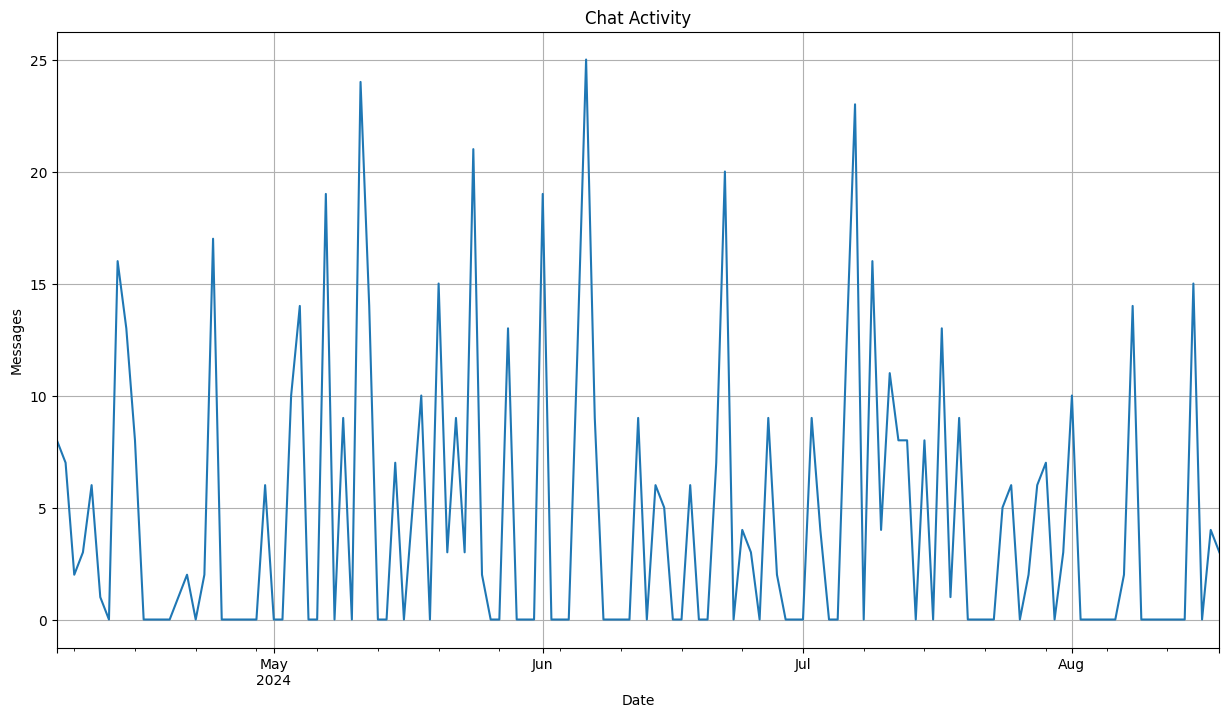

In [15]:
# Group by date and count messages
activity_df = messages_df.groupby([pd.Grouper(key='Timestamp', freq='D')]).count()

#Line plot
activity_df.plot.line(
    figsize=(15,8),
    title='Chat Activity',
    xlabel='Date',
    ylabel='Messages',
    grid=True,
    legend=False
)

